# **Introduction - K-Means Clustering**

## What is Clustering?
![Clustering Illustration](https://miro.medium.com/v2/resize:fit:1400/1*fIdNbG1ZRM9JIitNkTJEfA.png)

Clustering is part of data analysis technique that involves the grouping of similar objects or data points together based on their characteristics. It helps discovering different structures, the similarities, and relationship within the datasets.

**While both clustering and classification involve grouping data, they differ fundamentally.** Clustering is an unsupervised learning technique where we don't have predefined class labels. Its purpose is to discover natural patterns and inherent structures in data without specific guidance. Unlike classification, which uses labeled data to predict categories, clustering automatically identifies segments based on feature similarities, allowing us to uncover insights that might not be apparent otherwise.

Clustering finds application in diverse domains, including customer segmentation, image recognition, anomaly detection, document clustering, and recommendation systems.

## Then, What is K-Means Algorithm?

K-Means is one of the popular algorithm of clustering. It is widely used and well-established techniques among the various clustering algorithms available. 

The K-Means algorithm is an iterative, centroid-based clustering technique. It starts by randomly initializing K cluster centroids, where K represents the desired number of clusters. The algorithm then iteratively assigns each data point to the nearest centroid and re-calculate the centroid's position based on the mean of the data points assigned to it. 

![K-Means Illustration](https://miro.medium.com/v2/resize:fit:1200/1*rw8IUza1dbffBhiA4i0GNQ.png)


## Dataset Description
This Marketing Campaign dataset contains information about 2,240 customers from a retail company, including demographic details, purchasing behaviors, and campaign responses. The dataset provides valuable insights into customer segmentation and purchasing patterns, with 29 attributes capturing various dimensions of customer behavior.

**Attribute Information:**
1. ID - Unique identifier for each customer
2. Year_Birth - Year of birth of the customer
3. Education - Highest education level attained by the customer
4. Marital_Status - Marital status of the customer
5. Income - Annual household income of the customer
6. Kidhome - Number of children in the customer's household
7. Teenhome - Number of teenagers in the customer's household
8. Dt_Customer - Date when the customer was enrolled with the company
9. Recency - Number of days since the last purchase
10. MntWines - Amount spent on wine products in the last 2 years
11. MntFruits - Amount spent on fruits products in the last 2 years
12. MntMeatProducts - Amount spent on meat products in the last 2 years
13. MntFishProducts - Amount spent on fish products in the last 2 years
14. MntSweetProducts - Amount spent on sweet products in the last 2 years
15. MntGoldProds - Amount spent on gold products in the last 2 years
16. NumDealsPurchases - Number of purchases made with a discount
17. NumWebPurchases - Number of purchases made through the company's website
18. NumCatalogPurchases - Number of purchases made using a catalog
19. NumStorePurchases - Number of purchases made directly in stores
20. NumWebVisitsMonth - Number of visits to company's website in the last month
21. AcceptedCmp3 - Whether the customer accepted the offer in the 3rd campaign
22. AcceptedCmp4 - Whether the customer accepted the offer in the 4th campaign
23. AcceptedCmp5 - Whether the customer accepted the offer in the 5th campaign
24. AcceptedCmp1 - Whether the customer accepted the offer in the 1st campaign
25. AcceptedCmp2 - Whether the customer accepted the offer in the 2nd campaign
26.Complain - Whether the customer complained in the last 2 years
27. Z_CostContact - Cost of contacting the customer
28. Z_Revenue - Revenue generated by the customer
Response - Whether the customer accepted the offer in the last campaign

## Import Libraries
Here are the libraries that are required in our project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Import Dataset

In [2]:
data = '/kaggle/input/marketing-campaign-data/marketing_campaign - marketing_campaign.csv'
df = pd.read_csv(data)

# **Exploratory Data Analysis**
Now, i will explore the data to discover insights or informations.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Missing value check and handling (if any)**

In [5]:
print("Missing Values Count: ")
print(df.isnull().sum())

Missing Values Count: 
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


There are 24 missing values in 'Income' feature, which might be important. We need to handle these missing values first. Median will be the best method to handle missing values in our case. Usually, Income has skewed distribution (abnormal) and likely has outliers. Median is robust against outlier compared with mean.

In [6]:
df['Income'].fillna(df['Income'].median(), inplace=True)

print("\nMissing values count after handling with median:")
print(df.isnull().sum())


Missing values count after handling with median:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


/tmp/ipykernel_13/3362261889.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


**Correlation Matrix**
* This will help us see the correlation score between each feature (numeric features only). High scores (close to 1) might indicate the best feature combinations and could result in the most insightful clustering.

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


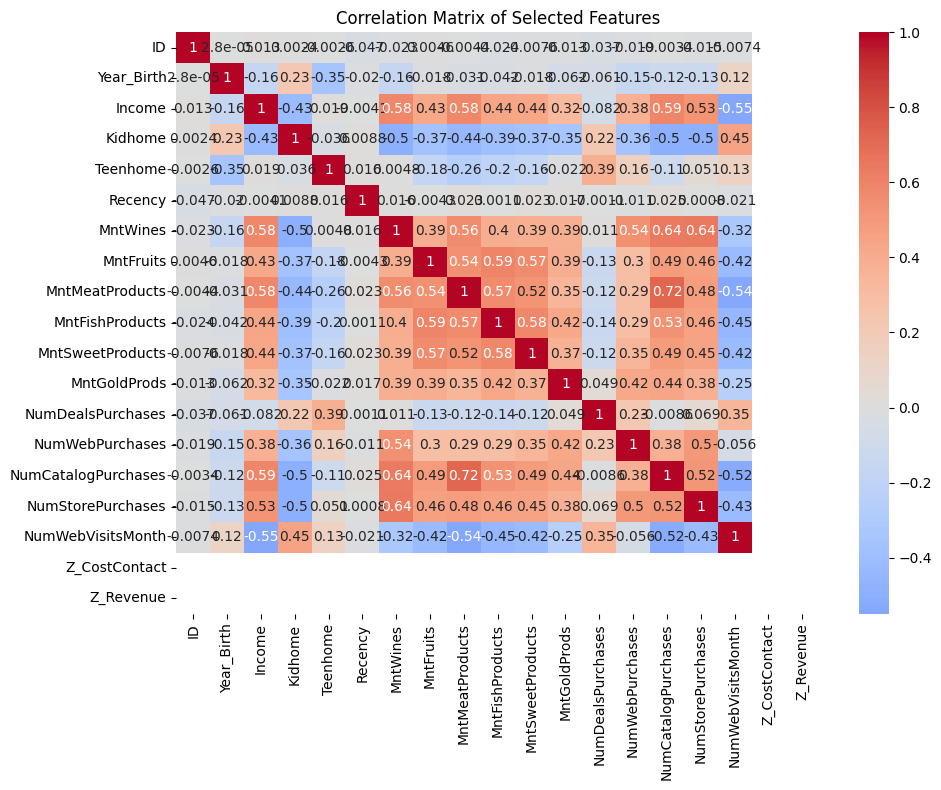

In [7]:
# Identify the numeric feature
numeric_columns =  df.select_dtypes(include=['int64','float64']).columns.tolist()

# Binary column filter
binary_columns = []
for col in numeric_columns:
    if set(df[col].unique()).issubset({0,1}):
        binary_columns.append(col)

final_columns = [col for col in numeric_columns if col not in binary_columns]

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[final_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Features')
plt.tight_layout()
plt.show()

> **What features are most relevant for clustering customer behavior?**
> **Based on the data and correlation matrix analyzed, the 3 most important features for clustering in this marketing campaign case are:**
* **Income** - A key factor indicating customers' purchasing power and showing moderate correlation with several other features. Income becomes an essential indicator for segmentation as it directly affects spending capacity.
* **MntMeatProducts** - Demonstrates customer preferences for premium products and has the highest correlation with NumCatalogPurchases (0.72). The meat products category appears to be an important differentiator in consumer behavior.
* **NumStorePurchases** - Represents preference for offline shopping and correlates with several spending variables. This indicates more traditional shopping patterns among customers.

> Here, i will choose MntMeatProducts and NumStorePurchases as our clustering features.

# **Pre-processing**
Handling missing values is part of pre-processing data too. Here, I would like to standardize the data so that all features have equal weight in the clustering process. For this analysis, I will specifically standardize the selected features that are most relevant for our clustering: MntMeatProducts and NumStorePurchases.

Standardization transforms these features to have a mean of 0 and a standard deviation of 1, which is particularly important for K-Means clustering as it uses Euclidean distance. Without standardization, MntMeatProducts might dominate the clustering process due to its potentially larger scale and variance compared to NumStorePurchases.

By standardizing only these selected features, we focus our clustering on the specific customer behaviors we've identified as most informative, while ensuring both variables contribute equally to the distance calculations.

**Standardization**

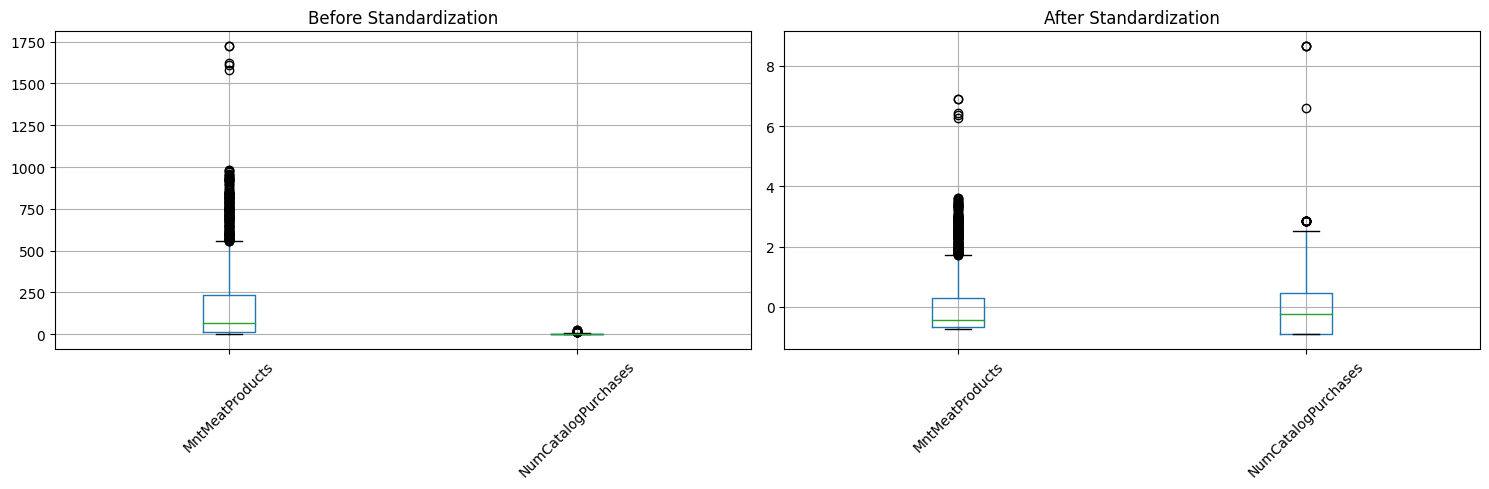

In [8]:
# Choosing the features
features = ['MntMeatProducts', 'NumCatalogPurchases']
df_features = df[features]

# Standardization function
scaler = StandardScaler()
df_standarized = pd.DataFrame(scaler.fit_transform(df_features), columns=features)

# Visualization before standardization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Before Standardization
df_features.boxplot(ax=ax1)
ax1.set_title('Before Standardization')
ax1.tick_params(axis='x', rotation=45)

# After Standardization
df_standarized.boxplot(ax=ax2)
ax2.set_title('After Standardization')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# **K-Means Clustering**

**Elbow Method**
* The Elbow Method is a technique for determining the optimal number of clusters in K-Means by calculating the WCSS (Within-Cluster Sum of Squares) for various values of k. The "elbow" point on the graph indicates where adding more clusters no longer provides a significant decrease in WCSS — that's the optimal point.

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

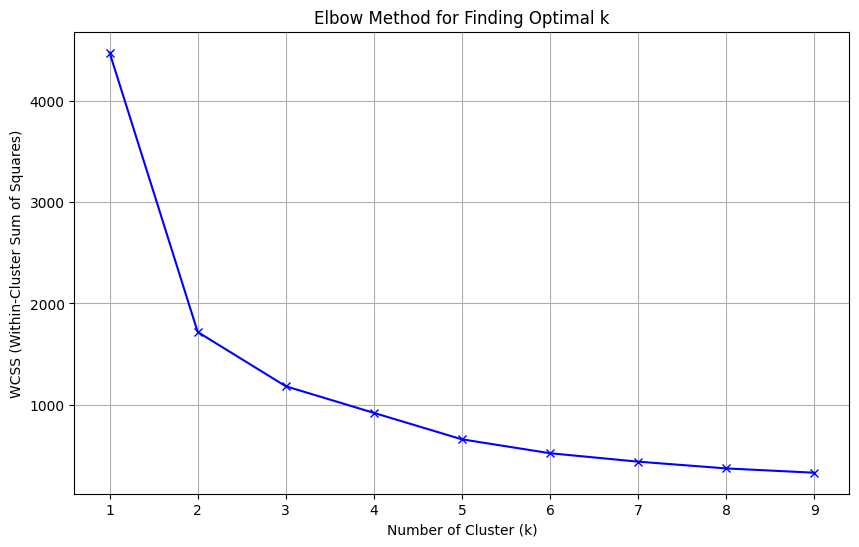

In [9]:
selected_features = ['MntMeatProducts', 'NumCatalogPurchases']
X = df_standarized[selected_features]

# Calculate WCSS for various value of k
wcss = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, 'bx-')
plt.title('Elbow Method for Finding Optimal k')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(K_range)
plt.grid(True)

> From the elbow graph, the best k is 2 which is when there is a change in the curve.

**Silhouette Method**
* The Silhouette Method evaluates clustering quality by measuring how similar an object is to its own cluster compared to other clusters. It produces a score ranging from -1 to 1, where higher values indicate better-defined clusters. The k value that maximizes the average silhouette score is considered optimal.

In [10]:
silhouette_scores = []
K_range_silhouette = range(2,10)  # Starting from 2

for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot Silhouette Method
best_k = K_range_silhouette[silhouette_scores.index(max(silhouette_scores))]
print(f"\nBest k value based on silhouette score: {best_k}")
print(f"Highest silhouette score: {max(silhouette_scores):.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8


Best k value based on silhouette score: 2
Highest silhouette score: 0.6410


> Based on silhouette score, the best k is also 2 with the score 0.6410

> When the two methods suggest different optimal k values, consider:
>1. Business context - Choose the k that provides more actionable insights for your specific application
>2. Visualization - Plot both clustering results and assess which creates more meaningful segments
>3. Stability - Test both k values on subsets of data to see which gives more consistent results
>4. Compromise - If Elbow suggests k=5 and Silhouette suggests k=2, consider testing intermediate values (k=3 or k=4)
>5. Domain knowledge - Prioritize interpretability and alignment with business understanding over purely statistical measures

**Model Training**

In [11]:
# Train K-Means model with k = 2 
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_standarized)

# Coordinates of each centroid
centroids = kmeans.cluster_centers_
print("Centroid of each cluster:")
for i, centroid in enumerate(centroids):
    print(f"\nCluster {i}:")
    for feature, value in zip(selected_features, centroid):
        print(f"{feature}: {value:.4f}")

# Add cluster column to the original dataset 
df_clustered = df_standarized.copy()
df_clustered['Cluster'] = kmeans.labels_

# Calculate and display cluster distribution
cluster_counts = df_clustered['Cluster'].value_counts()
total_records = len(df_clustered)
print("\nCluster Distribution:")
for cluster, count in cluster_counts.items():
    percentage = (count / total_records) * 100
    print(f"Cluster {cluster}: {count} customers ({percentage:.2f}%)")

# Statistics per cluster
print("\nStatistics per cluster:")
for cluster in sorted(df_clustered['Cluster'].unique()):
    print(f"\nCluster {cluster} statistics:")
    print(df_clustered[df_clustered['Cluster'] == cluster][selected_features].describe())

# Display the first few rows
print("\nSample data with cluster labels:")
print(df_clustered.head())


Centroid of each cluster:

Cluster 0:
MntMeatProducts: -0.4779
NumCatalogPurchases: -0.4741

Cluster 1:
MntMeatProducts: 1.3004
NumCatalogPurchases: 1.2900

Cluster Distribution:
Cluster 0: 1638 customers (73.12%)
Cluster 1: 602 customers (26.88%)

Statistics per cluster:

Cluster 0 statistics:
       MntMeatProducts  NumCatalogPurchases
count      1638.000000          1638.000000
mean         -0.477928            -0.474088
std           0.298765             0.459947
min          -0.739813            -0.910898
25%          -0.691069            -0.910898
50%          -0.615736            -0.568720
75%          -0.358718            -0.226541
max           1.015000             1.142175

Cluster 1 statistics:
       MntMeatProducts  NumCatalogPurchases
count       602.000000           602.000000
mean          1.300410             1.289960
std           1.080545             0.933576
min          -0.527109            -0.910898
25%           0.509827             0.799996
50%           1.11913

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


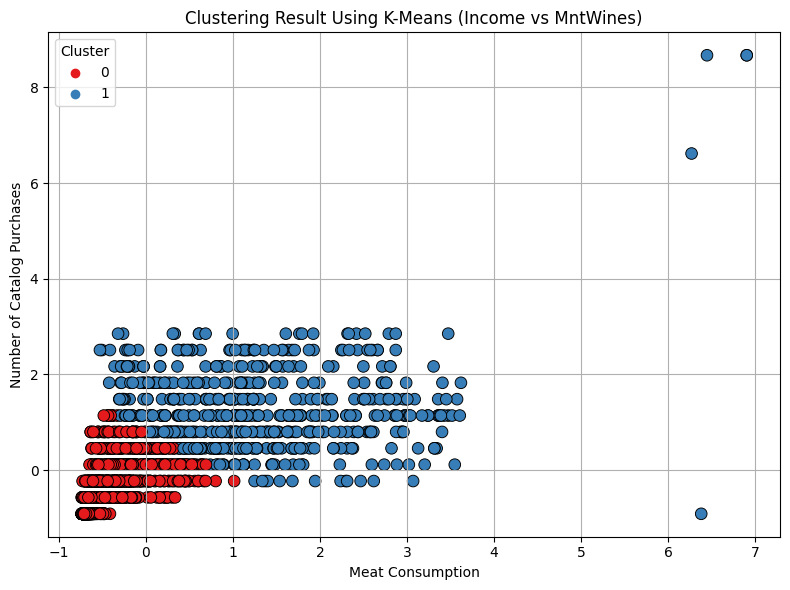

In [12]:
# Create a scatter plot of clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_clustered,
    x='MntMeatProducts',
    y='NumCatalogPurchases',
    hue='Cluster',
    palette='Set1',
    s=70,
    edgecolor='k'
)

plt.title("Clustering Result Using K-Means (Income vs MntWines)")
plt.xlabel("Meat Consumption")
plt.ylabel("Number of Catalog Purchases")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

> **What is the purpose of the random_state parameter in K-Means?**  
- The random_state parameter is used to set the seed for the random number generator, ensuring that the clustering results are consistent every time the code is run reproducibility.  

> **How to Check the Centroids of Each Cluster?**
- The centroids can be accessed using the `.cluster_centers_` attribute after the K-Means model is trained.

# **Cluster Analysis**

### Insights from My K-Means Clustering Analysis
During this cluster analysis, I discovered several key concepts **(and realized how much I still had to learn!🤩)** about interpreting centroid values, statistical measures, and visualization outputs. Here are some fascinating insights I'd like to share:

#### 1. Understanding Centroid Meaning

The centroid represents the **"typical customer"** or average example from each cluster. With 2 clusters, we have 2 centroids. Looking at our data, Cluster 0 has a MntMeatProducts value of -0.4779, indicating it falls below the population average.

* #### Standardized Values Interpretation:
    - Value of 0 = Exactly at population average
    - Negative value = Below population average
    - Positive value = Above population average

#### 2. Practical Interpretation of Centroids

Cluster 0's MntMeatProducts centroid at -0.4779 shows this is a group of customers who purchase meat products **less frequently than the average customer.** Similarly, Cluster 1's NumCatalog centroid at 1.2900 indicates these customers make catalog purchases at a **rate significantly above the population average.**

#### 3. Cluster Size Distribution Insights

The statistical analysis reveals that 73% of customers belong to Cluster 0, while 27% are in Cluster 1. This immediately suggests business opportunities - **we could offer special discounts on meat products to Cluster 0 customers, while providing priority access to new premium products via catalog to Cluster 1 customers.**

#### 4. Outlier Detection and Super-Premium Customers

The cluster visualization highlights outliers in Cluster 1, indicating the presence of **"super-premium"** customers whose purchasing behavior far exceeds the average. These customers might warrant personalized marketing approaches and VIP treatment.

**By converting these standardized values back to original scales, we can develop concrete, actionable marketing strategies for each customer segment, making our data-driven approach both insightful and practical.**

In [13]:
 # Converting standardized centroids back to original values
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

# Display centroids in original scale
print("Centroids in original values:")
for i, centroid in enumerate(centroids_original):
   print(f"\nCluster {i} (original values):")
   for feature, value in zip(selected_features, centroid):
       print(f"{feature}: {value:.2f}")

# Calculate descriptive statistics for each cluster in original values
df['Cluster'] = kmeans.labels_
print("\nCluster statistics in original values:")
for cluster_id in range(2):
   print(f"\nCluster {cluster_id} (original values):")
   cluster_stats = df[df['Cluster'] == cluster_id][selected_features].describe()
   print(cluster_stats)

# Create marketing recommendations based on original values
cluster_sizes = df['Cluster'].value_counts()
total_customers = len(df)

print("\n===== INSIGHTS =====")

# For Low Value Cluster
low_cluster = 0 if centroids_original[0][0] < centroids_original[1][0] else 1
high_cluster = 1 - low_cluster

low_meat_avg = df[df['Cluster'] == low_cluster]['MntMeatProducts'].mean()
low_catalog_avg = df[df['Cluster'] == low_cluster]['NumCatalogPurchases'].mean()
low_cluster_pct = (cluster_sizes[low_cluster] / total_customers) * 100

print(f"\nLow Value Segment (Cluster {low_cluster}):")
print(f"- Number of customers: {cluster_sizes[low_cluster]} ({low_cluster_pct:.1f}% of total)")
print(f"- Average meat product purchases: ${low_meat_avg:.2f}")
print(f"- Average catalog purchases: {low_catalog_avg:.1f} times")

# For High Value Cluster
high_meat_avg = df[df['Cluster'] == high_cluster]['MntMeatProducts'].mean()
high_catalog_avg = df[df['Cluster'] == high_cluster]['NumCatalogPurchases'].mean()
high_cluster_pct = (cluster_sizes[high_cluster] / total_customers) * 100

print(f"\nPremium Segment (Cluster {high_cluster}):")
print(f"- Number of customers: {cluster_sizes[high_cluster]} ({high_cluster_pct:.1f}% of total)")
print(f"- Average meat product purchases: ${high_meat_avg:.2f}")
print(f"- Average catalog purchases: {high_catalog_avg:.1f} times")

Centroids in original values:

Cluster 0 (original values):
MntMeatProducts: 59.10
NumCatalogPurchases: 1.28

Cluster 1 (original values):
MntMeatProducts: 460.41
NumCatalogPurchases: 6.43

Cluster statistics in original values:

Cluster 0 (original values):
       MntMeatProducts  NumCatalogPurchases
count      1638.000000          1638.000000
mean         59.098291             1.276557
std          67.420875             1.344170
min           0.000000             0.000000
25%          11.000000             0.000000
50%          28.000000             1.000000
75%          86.000000             2.000000
max         396.000000             6.000000

Cluster 1 (original values):
       MntMeatProducts  NumCatalogPurchases
count       602.000000           602.000000
mean        460.406977             6.431894
std         243.841126             2.728328
min          48.000000             0.000000
25%         282.000000             5.000000
50%         419.500000             6.000000
75%    

>
 # **Marketing Strategy Based on Clustering Insights**

 ## Positioning as a Marketing Strategist

As a business analyst or marketing strategist, I recognize that these clustering insights, though simple with just two features, offer valuable direction for targeted campaigns. Here's my proposed marketing approach:

## Cluster 0: Low-Value Segment (73% of customers)

1. **Special Meat Product Discounts**  
   Offer targeted discounts on meat products to this segment. This can trigger initial interest in our meat offerings, **potentially creating habitual purchasing behavior** that continues even after promotions end.

2. **Redesigned Affordable Catalog**  
   Since this cluster shows low catalog purchase rates, introduce a new catalog with more accessible price points. This may **stimulate new shopping behaviors, encouraging catalog exploration and eventually increasing overall purchase frequency.**

3. **Establish Measurable Growth Targets**  
   Set **specific goals** for increasing meat product purchases within this segment (e.g., 15% growth in 6 months). This ensures our data-driven insights translate to trackable positive business impacts.

## Cluster 1: Premium Segment (27% of customers)

1. **Exclusive Loyalty Program**  
   Implement a rewards system with enhanced point values for these high-value customers. For example, catalog purchases could earn **redeemable points** for complimentary premium products, reinforcing their catalog shopping habits.

2. **Priority Access Program**  
   Create an "Early Access" initiative for new product launches and pre-order opportunities. Premium customers typically value privileged access, and this approach both **recognizes their status and strengthens brand loyalty.**

3. **Free Shipping Incentives**  
   Offer complimentary shipping on their next catalog order. This removes a purchasing barrier while encouraging **continued engagement** with our catalog offerings.

## Next Steps

While this two-feature analysis provides a solid foundation, I recommend expanding our clustering approach to incorporate additional variables such as purchase recency, customer tenure, and category-specific behaviors for even more refined segmentation and personalized marketing strategies.

## Thank You for Exploring This Analysis!

------
### Connect With Me

If you're interested in discussing this analysis further, exploring collaboration opportunities, or sharing insights about data science and marketing analytics, I'd love to connect:

- **LinkedIn:** [Amanda Putri](https://www.linkedin.com/in/amandaputriapr/)
- **GitHub:** [mandayash](https://github.com/mandayash)
- **Instagram:** [@manda.yash](https://www.instagram.com/manda.yash/)

Feel free to reach out with questions, feedback, or ideas for future analyses. I'm always open to connecting with fellow data enthusiasts and marketing professionals!

**Don't forget to upvote this notebook if you found it helpful!** 📊✨